In [1]:
import cv2
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sys
%matplotlib inline
np.set_printoptions(suppress=True)

## Image Operations & Transformations

### Image Binarization - Thresholding

In [4]:
def binarization(image, threshold):
    im = cv2.imread(image)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    height = im.shape[0]
    weight = im.shape[1]
    channels = im.shape[2]
    
    im_binary = np.where(im_gray<=threshold,0,255)
    
    #original image
    cv2.imwrite("im_gray.jpg", im_gray)
    gray = cv2.imread("im_gray.jpg")
    cv2.imshow("Original Image", gray)
    
    #result image
    cv2.imwrite("im_binary.jpg", im_binary)
    binary = cv2.imread("im_binary.jpg")
    cv2.imshow("Result Binary Image", binary)
    
    #parameters
    cv2.waitKey(16000)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    sys.exit()

In [5]:
binarization('nature.jpg', 100)

SystemExit: 

/Users/jjosue/anaconda3/envs/galileo_python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Original Image

<img src='im_gray.jpg'/>

### Result Binary Image

<img src='im_binary.jpg'/>

## Aritmetic and Logical Operations

Now, I'll define a function for the following aritmetic and logical operations:

- Addition
- Substraction
- AND
- OR
- XOR

These will be the input images

**Note: Both images have the same size for simplicity purposes**

<img src = 'batman.jpg'/>

<img src = 'triangle.jpg'/>

In [62]:
def binary_image(image, threshold):
    im = cv2.imread(image)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    im_binary = np.where(im_gray<=threshold,0,255)
    return(im_binary)

In [155]:
def im_operation(image1, image2, operation):
    
    if operation not in ['addition', 'substraction', 'and', 'or', 'xor']:
        print('Please select an operation from the following: addition, substraction, and, or, xor')
        return(0)
    print(operation)
    
    if operation == 'addition':
        out = binary_image(image1, 180) + binary_image(image2, 180)
        #result image
        cv2.imwrite(operation+'.jpg', out)
        op_image = cv2.imread(operation+'.jpg')
        return(op_image)
    
    if operation == 'substraction':
        out = binary_image(image1, 180) - binary_image(image2, 180)
        #result image
        cv2.imwrite(operation+'.jpg', out)
        op_image = cv2.imread(operation+'.jpg')
        return(op_image)
    
    if operation == 'and':
        out = np.where( 
            ((binary_image(image1, 180)==0) & (binary_image(image2, 180)==0)),
            0,
            np.where(
                ((binary_image(image1, 180)==0) & (binary_image(image2, 180)==255)) | ((binary_image(image1, 180)==255) & (binary_image(image2, 180)==0)),
                0,
                255
            )
        )
        #result image
        cv2.imwrite(operation+'.jpg', out)
        op_image = cv2.imread(operation+'.jpg')
        return(op_image)
    
    if operation == 'or':
        out = np.where( 
            ((binary_image(image1, 180)==0) & (binary_image(image2, 180)==0)),
            0,
            255
        )
        #result image
        cv2.imwrite(operation+'.jpg', out)
        op_image = cv2.imread(operation+'.jpg')
        return(op_image)
    
    if operation == 'xor':
        out = np.where( 
            ((binary_image(image1, 180)==0) & (binary_image(image2, 180)==0)),
            0,
            np.where(
                ((binary_image(image1, 180)==0) & (binary_image(image2, 180)==255)) | ((binary_image(image1, 180)==255) & (binary_image(image2, 180)==0)),
                255,
                0
            )
        )
        #result image
        cv2.imwrite(operation+'.jpg', out)
        op_image = cv2.imread(operation+'.jpg')
        return(op_image)

### Results

addition


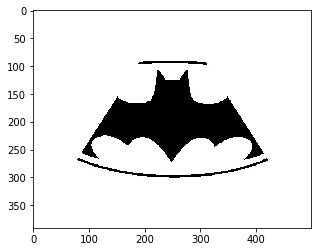

In [144]:
plt.imshow(
    im_operation('batman.jpg', 'triangle.jpg', 'addition')
)

substraction


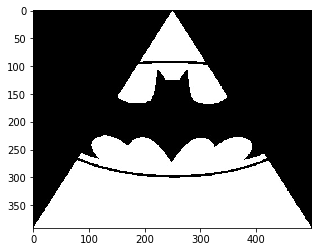

In [145]:
plt.imshow(
    im_operation('batman.jpg', 'triangle.jpg', 'substraction')
)

substraction


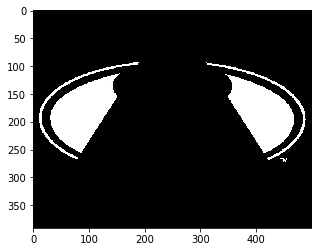

In [146]:
plt.imshow(
    im_operation('triangle.jpg', 'batman.jpg', 'substraction')
)

and


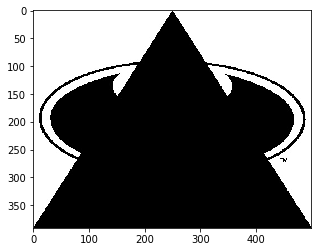

In [151]:
plt.imshow(
    im_operation('batman.jpg', 'triangle.jpg', 'and')
)

or


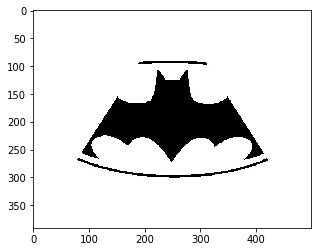

In [153]:
plt.imshow(
    im_operation('batman.jpg', 'triangle.jpg', 'or')
)

xor


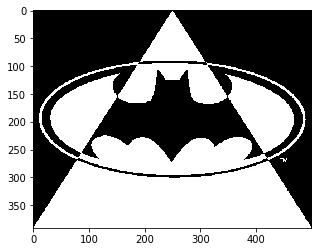

In [156]:
plt.imshow(
    im_operation('batman.jpg', 'triangle.jpg', 'xor')
)

## 3D Images

### This is the original image for this example

<img src = 'batman.jpg'/>

In [169]:
from mpl_toolkits.mplot3d import Axes3D

In [193]:
def im_3d(image, elev, rotation):
    im = cv2.imread(image)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    x = im_gray.shape[0]
    y = im_gray.shape[1]
    
    X, Y = np.mgrid[range(0, x),range(0, y)]
    
    ax.view_init(elev=elev, azim=rotation)
    
    ax.plot_surface(X, Y, im_gray, cmap = plt.cm.gray)
    plt.title(image)

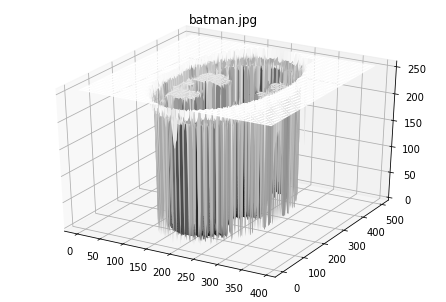

In [196]:
im_3d('batman.jpg', 30, -60)

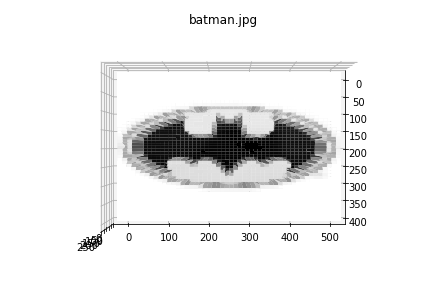

In [197]:
im_3d('batman.jpg', 90, 0)

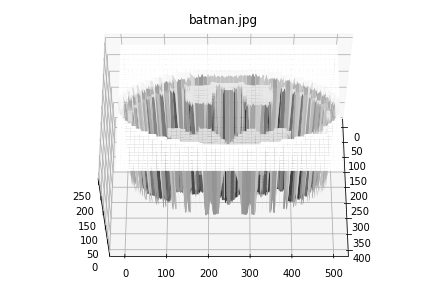

In [198]:
im_3d('batman.jpg', 60, 0)

## Image Transformations

In [ ]:
def im_transform(image):
    